In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
sns.set()

attendance_df = pd.read_csv('../data/matches_transformed.csv', sep=',')

## Features - Target - Split
X = attendance_df.drop('attendance', axis=1)
y = attendance_df['attendance']

## Test - Train - Split

X_train, X_test, y_train, y_test, = train_test_split(
    X,
    y,
    train_size=2/3, random_state=1234)

In [2]:
## Features standardisieren
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

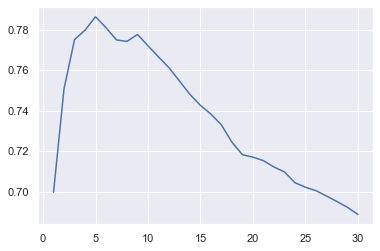

In [3]:
from sklearn.neighbors import KNeighborsRegressor
nns = range(1, 31)
scores = []

for nn in nns:
    model = KNeighborsRegressor(n_neighbors = nn)
    model.fit(X_train_sc, y_train)
    scores.append(model.score(X_test_sc, y_test))

sns.lineplot(x=nns, y=scores)
plt.show()

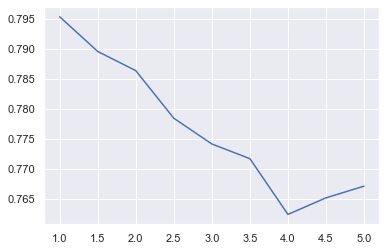

In [5]:
#Bester Wert bei 5
ps = np.arange(1.0, 5.5, 0.5)
scores = []

for p in ps:
    model = KNeighborsRegressor(p = p, n_neighbors=5)
    model.fit(X_train_sc, y_train)
    scores.append(model.score(X_test_sc, y_test))

sns.lineplot(x=ps, y=scores)
plt.show()


0.7953252552403681


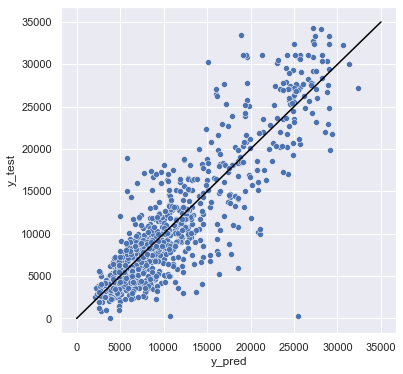

In [6]:
model = KNeighborsRegressor(p = 1, n_neighbors=5)
model.fit(X_train_sc, y_train)
print(model.score(X_test_sc, y_test))
y_pred = model.predict(X_test_sc)
plt.figure(figsize=(6,6))
ax = sns.scatterplot(x=y_pred, y=y_test)
ax.set(xlabel='y_pred', ylabel='y_test')
ls = np.linspace(0, 35000, 100)
plt.plot(ls, ls, color='black')
plt.show()
